In [10]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# Base.classes.keys()
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
resultsJun = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == "06").all()

#print(resultsJun)

In [20]:
#  3. Convert the June temperatures to a list.
JuneList = list(resultsJun)
#JuneList

In [18]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
Junedf = pd.DataFrame(resultsJun, columns=['date','temperatures'])
Junedf.set_index(Junedf['date'], inplace=True)
#print(Junedf.to_string(index=False))

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
Junedf.describe()

,temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [56]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
resultsDec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == "12").all()
#print(resultsDec)

In [63]:
# 7. Convert the December temperatures to a list.
DecList = list(resultsDec)
#DecList

In [65]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Decdf = pd.DataFrame(resultsDec, columns=['date','temperatures'])
Decdf.set_index(Decdf['date'], inplace=True)
#print(Decdf.to_string(index=False))

In [66]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Decdf.describe()

,temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

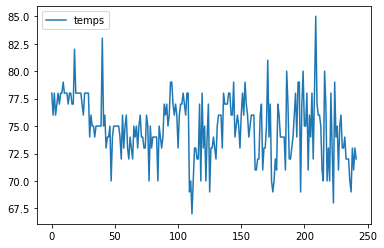

In [44]:
##ADDITIONAL QUERY 
Jun2010 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == "06",
                                extract('year', Measurement.date) == "2010").all()
June2010List = list(Jun2010)
Junedf = pd.DataFrame(Jun2010, columns =["date", "temps"])
Junedf.plot()

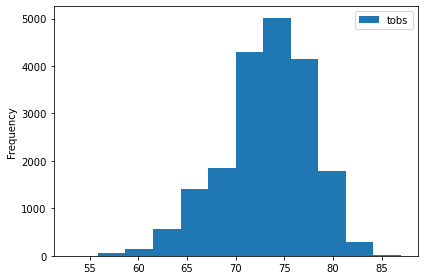

In [45]:
##ADDITONAL QUERY
results = session.query(Measurement.tobs).\
filter(extract("month", Measurement.date == '2010')).all()
#print(results)
#turn the results into a DF
df = pd.DataFrame(results, columns=['tobs'])
#print(df.to_string(index = False))
df.plot.hist(bins=12)
plt.tight_layout()

In [50]:
##ADDITONAL QUERY
resultsDecPrep = session.query(Measurement.date, Measurement.prcp).filter(extract('month', 
                                                                                  Measurement.date) == "12").all()
DecPrepList = list(resultsDecPrep)
DecPrepdf = pd.DataFrame(resultsDecPrep, columns=['date','temperatures'])
DecPrepdf.set_index(DecPrepdf['date'], inplace=True)
DecPrepdf.describe()



,temperatures
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [52]:
## ADDITIONAL QUERY
totalresults = session.query(Measurement.date, Measurement.tobs).all()
totalList = list(totalresults)
totalDf = pd.DataFrame(totalresults, columns = ['date', 'temperatures'])
totalDf.set_index(totalDf['date'], inplace =True)
totalDf.describe()

,temperatures
count,19550.000000
mean,73.097954
std,4.523527
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000
